In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("iris.csv")
dataset.head()

,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm,Species
0,1.0,0.2,4.6,3.6,0
1,1.1,0.1,4.3,3.0,0
2,1.2,0.2,5.0,3.2,0
3,1.2,0.2,5.8,4.0,0
4,1.3,0.2,4.4,3.0,0


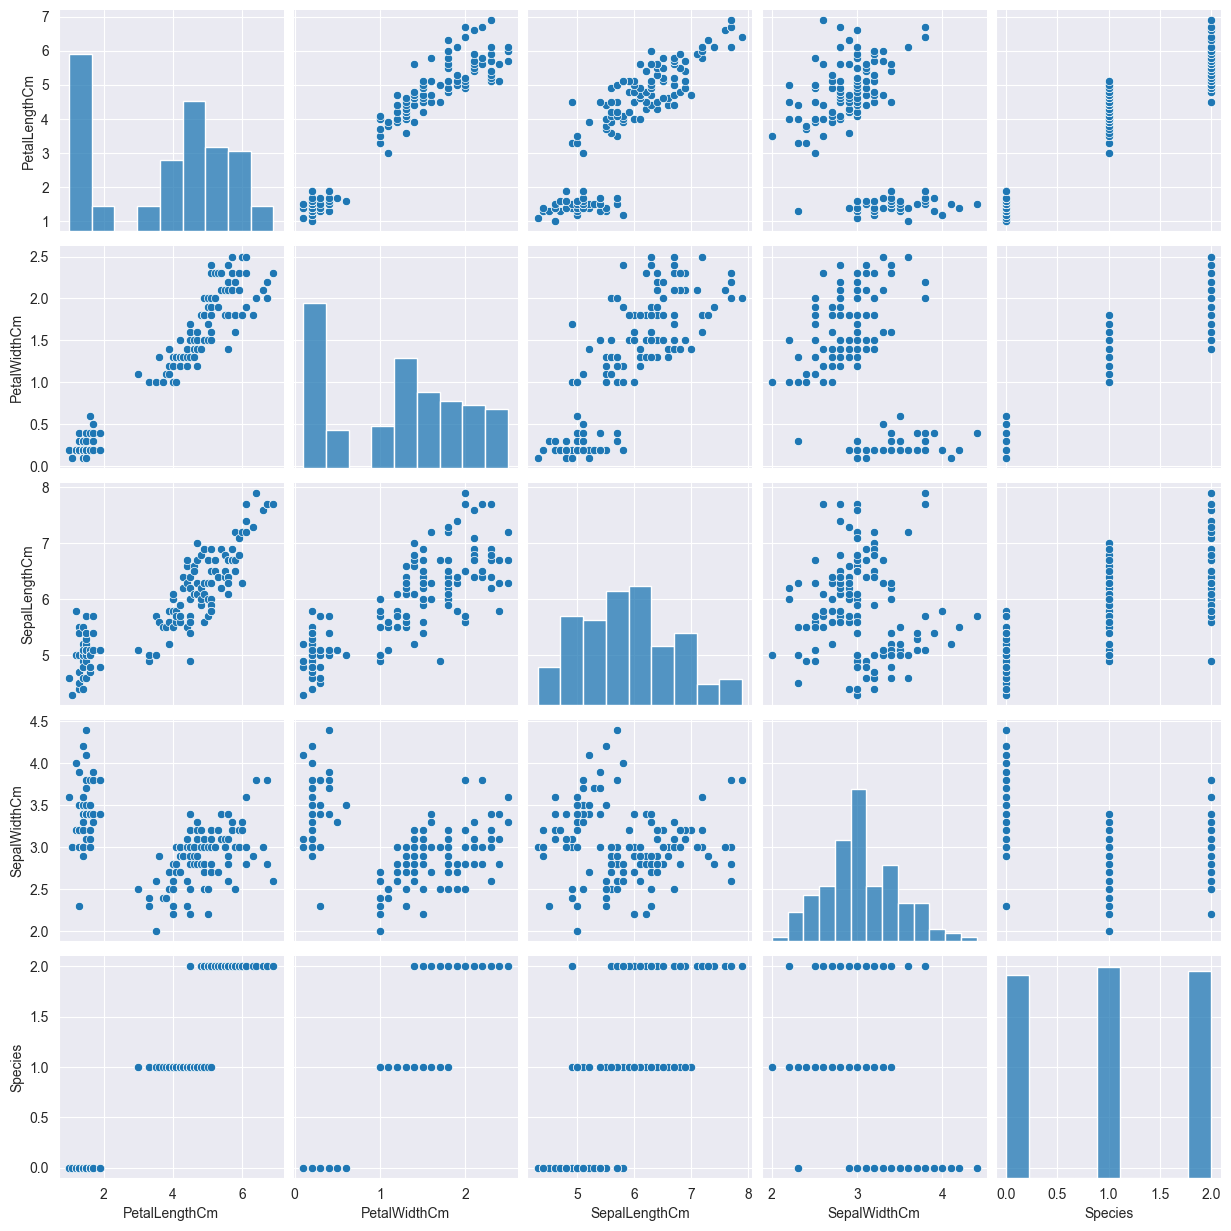

In [4]:
sns.pairplot(dataset)

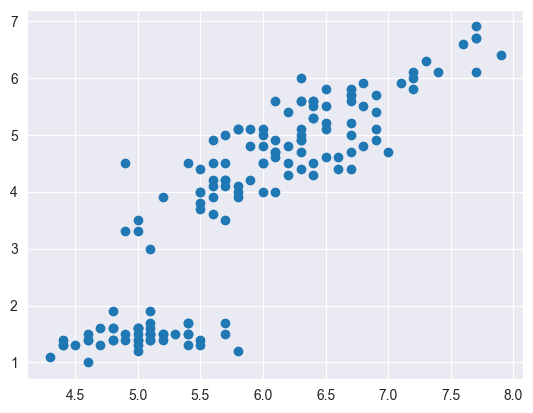

In [5]:
plt.plot(dataset["SepalLengthCm"],dataset["PetalLengthCm"],'o')

plt.show()

In [6]:
x = dataset["SepalLengthCm"].values.reshape(147,1)
y = dataset["PetalLengthCm"].values.reshape(147,1)
x = np.hstack((x**2, x))
print(x.shape,y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

(147, 2) (147, 1)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
means = scaler.mean_
scales = np.sqrt(scaler.var_)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = (x_test - means)/scales
print(x_test_scaled)

[[-0.49491921 -0.44383961]
 [-0.82043134 -0.8050495 ]
 [-0.92487916 -0.9254528 ]
 [ 0.72194856  0.76019337]
 [ 2.29475016  2.08462964]
 [-1.02729886 -1.04585609]
 [-0.26777056 -0.20303301]
 [-0.92487916 -0.9254528 ]
 [-0.15115407 -0.08262971]
 [-1.02729886 -1.04585609]
 [-1.02729886 -1.04585609]
 [-0.60545137 -0.5642429 ]
 [ 1.69442873  1.60301645]
 [-0.49491921 -0.44383961]
 [ 0.33559304  0.39898348]
 [ 0.98965947  1.00099996]
 [-1.02729886 -1.04585609]
 [-0.49491921 -0.44383961]
 [ 1.26548284  1.24180656]
 [-1.50897569 -1.64787258]
 [ 0.2108641   0.27858018]
 [-1.22605393 -1.28666269]
 [ 2.4499008   2.20503294]
 [-1.12769045 -1.16625939]
 [ 0.33559304  0.39898348]
 [-0.60545137 -0.5642429 ]
 [ 2.4499008   2.20503294]
 [ 1.40643669  1.36220985]
 [ 0.08816326  0.15817688]
 [-0.26777056 -0.20303301]
 [ 0.98965947  1.00099996]
 [-0.82043134 -0.8050495 ]
 [-0.92487916 -0.9254528 ]
 [-1.02729886 -1.04585609]
 [-0.60545137 -0.5642429 ]
 [-1.02729886 -1.04585609]
 [ 0.2108641   0.27858018]
 

In [8]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(3,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]
 [0.97873798]]


In [9]:
ones_column = np.ones((x_train_scaled.shape[0], 1))
ones_column2 = np.ones((x_test_scaled.shape[0], 1))
X_train_scaled = np.hstack((x_train_scaled, ones_column))
X_test_scaled = np.hstack((x_test_scaled, ones_column2))
print(X_test_scaled)

[[-0.49491921 -0.44383961  1.        ]
 [-0.82043134 -0.8050495   1.        ]
 [-0.92487916 -0.9254528   1.        ]
 [ 0.72194856  0.76019337  1.        ]
 [ 2.29475016  2.08462964  1.        ]
 [-1.02729886 -1.04585609  1.        ]
 [-0.26777056 -0.20303301  1.        ]
 [-0.92487916 -0.9254528   1.        ]
 [-0.15115407 -0.08262971  1.        ]
 [-1.02729886 -1.04585609  1.        ]
 [-1.02729886 -1.04585609  1.        ]
 [-0.60545137 -0.5642429   1.        ]
 [ 1.69442873  1.60301645  1.        ]
 [-0.49491921 -0.44383961  1.        ]
 [ 0.33559304  0.39898348  1.        ]
 [ 0.98965947  1.00099996  1.        ]
 [-1.02729886 -1.04585609  1.        ]
 [-0.49491921 -0.44383961  1.        ]
 [ 1.26548284  1.24180656  1.        ]
 [-1.50897569 -1.64787258  1.        ]
 [ 0.2108641   0.27858018  1.        ]
 [-1.22605393 -1.28666269  1.        ]
 [ 2.4499008   2.20503294  1.        ]
 [-1.12769045 -1.16625939  1.        ]
 [ 0.33559304  0.39898348  1.        ]
 [-0.60545137 -0.5642429 

In [10]:
def model(X, theta):
    return X.dot(theta)


def cost_function(X, y, theta):
    m = len(y)
    return 1 / (2 * m) * np.sum((model(X, theta) - y) ** 2)


cost_function(X_train_scaled, y_train, theta)

4.610826872386807

In [11]:
def grad(X, y, theta):
    m = len(y)
    return 1 / m * X.T.dot(model(X, theta) - y)


def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(
        n_iterations)  # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y,
                                             theta)  # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta)  # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history

In [12]:
n_iterations = 4000
learning_rate = 0.4

theta_final, cost_history = gradient_descent(X_train_scaled, y_train, theta, learning_rate, n_iterations)

theta_final

array([[-2.92075894],
       [ 4.47502474],
       [ 3.83921569]])

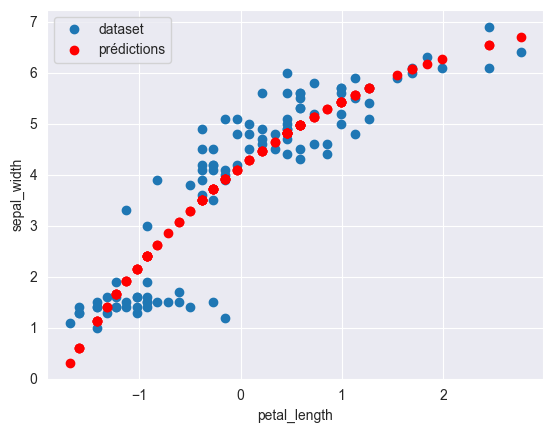

In [14]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X_train_scaled, theta_final)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(X_train_scaled[:, 0],y_train,'o',label='dataset')
plt.plot(X_train_scaled[:, 0],predictions ,'o',c='r',label='prédictions')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()